In [1]:
from google.colab import files


# Upload your CSV file
uploaded = files.upload()

Saving Netflix_data1.csv to Netflix_data1.csv


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [3]:
df = pd.read_csv("Netflix_data1.csv")

In [4]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [5]:
df.shape

(8790, 10)

In [6]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [8]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

<Axes: >

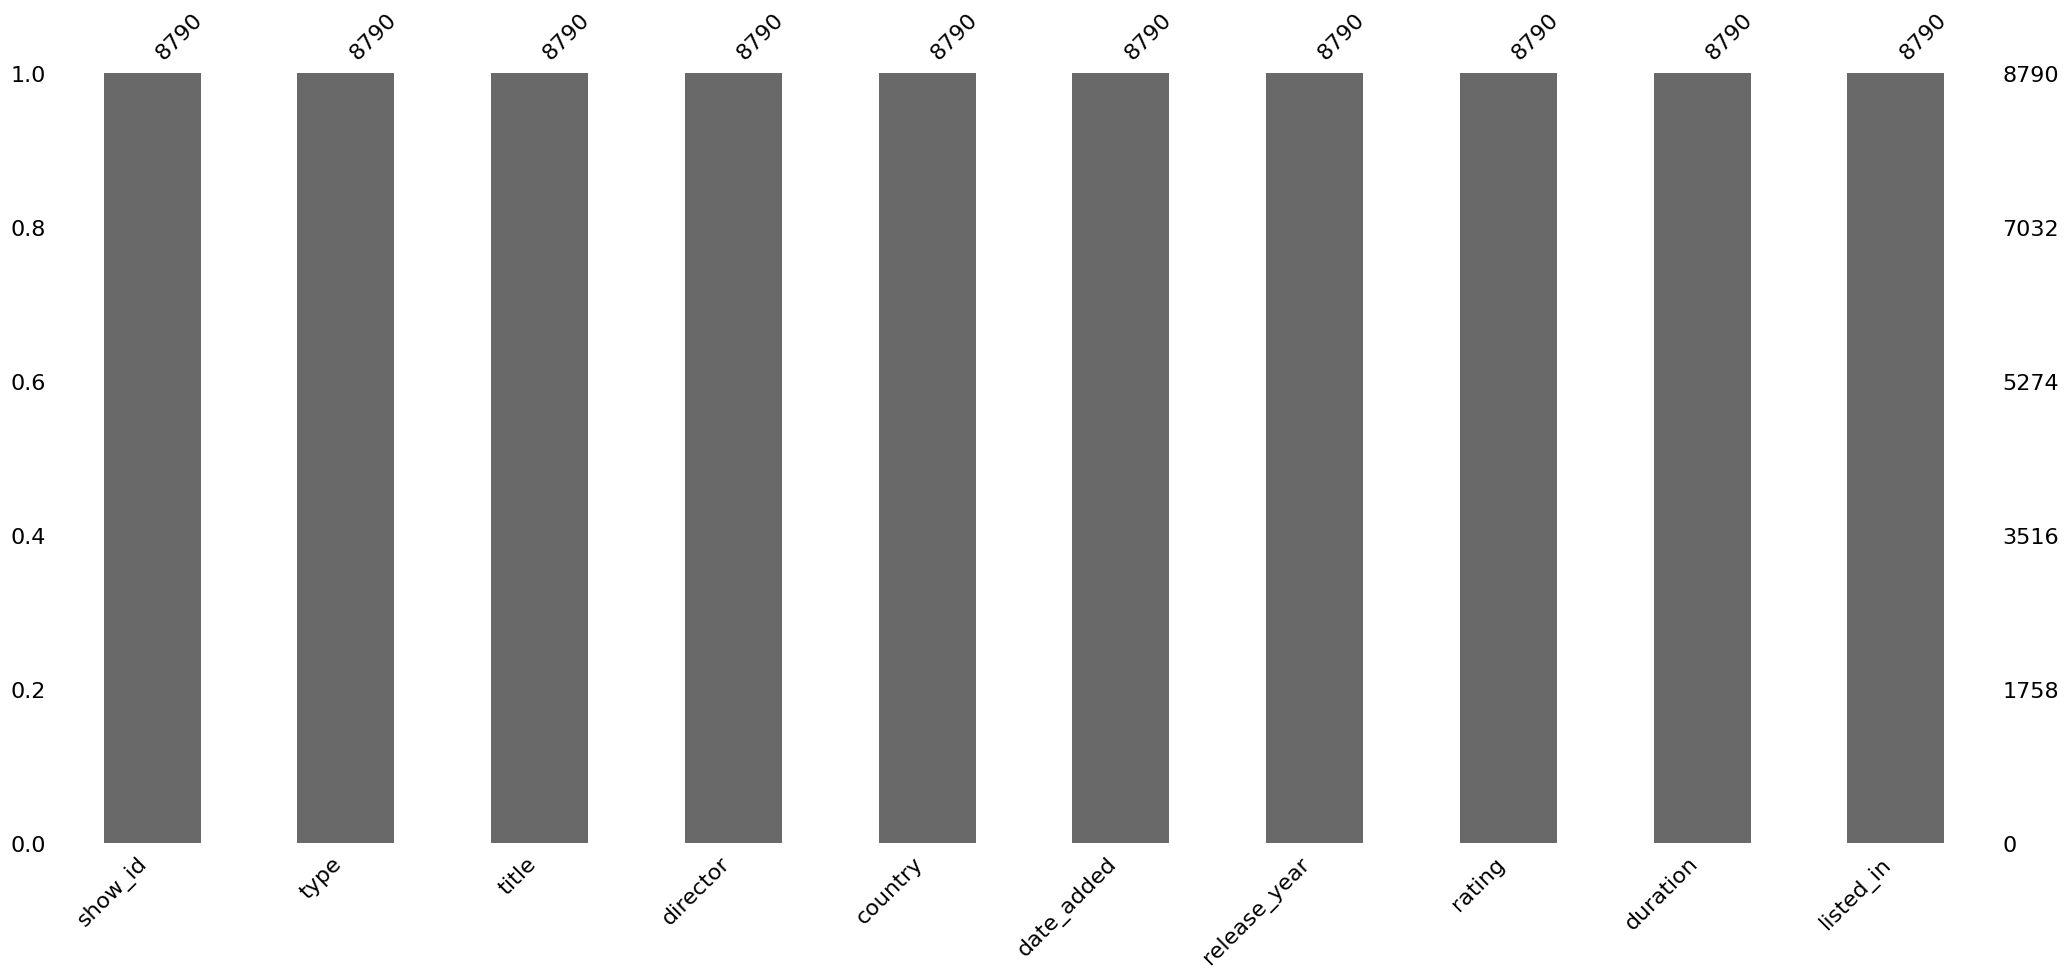

In [9]:
missingno.bar(df)

In [10]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    print("{}'s null rate :{}%".format(i,round(null_rate,2)))


show_id's null rate :0.0%
type's null rate :0.0%
title's null rate :0.0%
director's null rate :0.0%
country's null rate :0.0%
date_added's null rate :0.0%
release_year's null rate :0.0%
rating's null rate :0.0%
duration's null rate :0.0%
listed_in's null rate :0.0%


In [11]:
df.nunique()

show_id         8790
type               2
title           8787
director        4528
country           86
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
dtype: int64

In [12]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [13]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

show_id         0.0
type            0.0
title           0.0
director        0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
dtype: float64

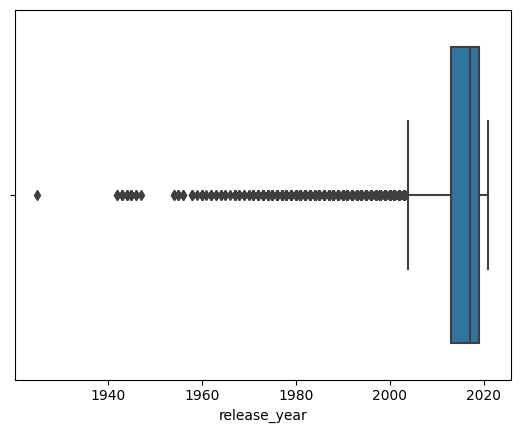

In [14]:
sns.boxplot(x=df["release_year"])
plt.show()

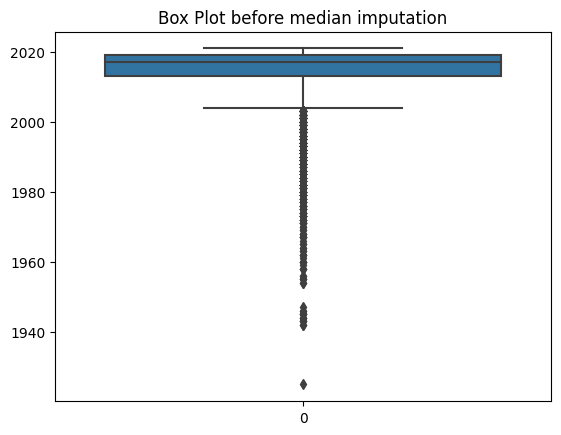

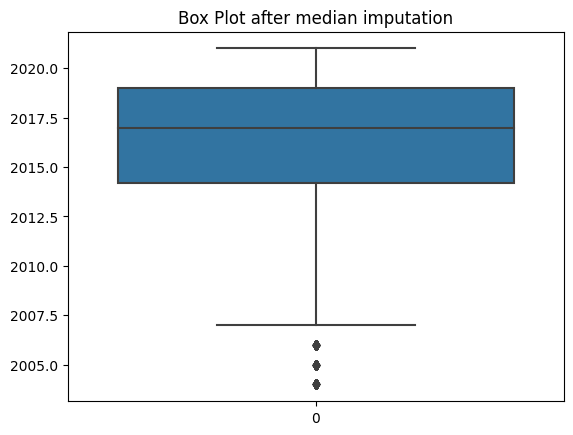

In [15]:
sns.boxplot(df['release_year'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = df['release_year'].quantile(0.25)
q3 = df['release_year'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.mean(df['release_year'])
for i in df['release_year']:
    if i > Upper_tail or i < Lower_tail:
            df['release_year'] = df['release_year'].replace(i, med)
sns.boxplot(df['release_year'])
plt.title("Box Plot after median imputation")
plt.show()

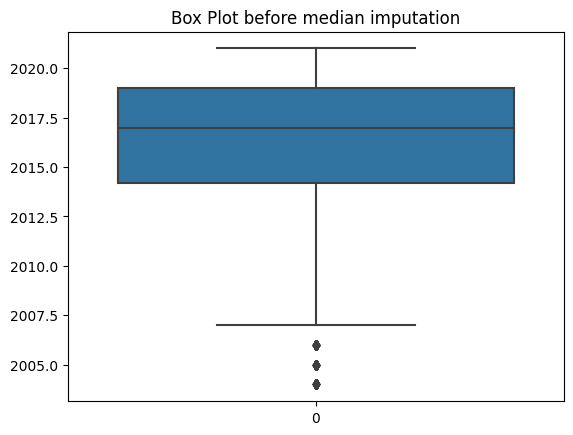

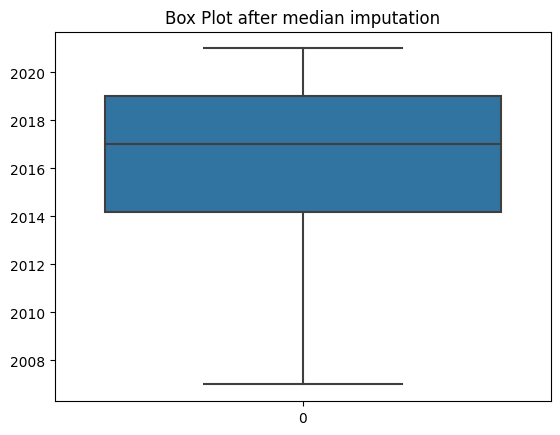

In [16]:
sns.boxplot(df['release_year'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = df['release_year'].quantile(0.25)
q3 = df['release_year'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df['release_year'])
for i in df['release_year']:
    if i > Upper_tail or i < Lower_tail:
            df['release_year'] = df['release_year'].replace(i, med)
sns.boxplot(df['release_year'])
plt.title("Box Plot after median imputation")
plt.show()

In [17]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020.000000,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021.000000,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021.000000,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021.000000,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,2014.183163,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016.000000,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016.000000,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012.000000,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016.000000,TV-Y,1 Season,Kids' TV


In [18]:
df.describe()

,release_year
count,8790.000000
mean,2016.460447
std,3.177553
min,2007.000000
25%,2014.183163
50%,2017.000000
75%,2019.000000
max,2021.000000


Text(0, 0.5, 'Value Count')

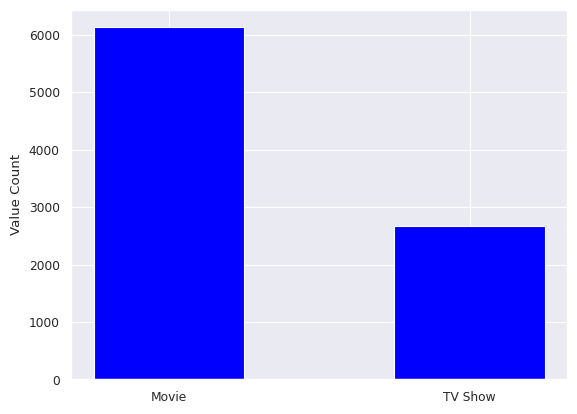

In [19]:
sns.set_theme('paper', style='darkgrid')
plt.bar(df.type.unique(), df.type.value_counts(), width=0.5, color='blue')
plt.ylabel('Value Count')

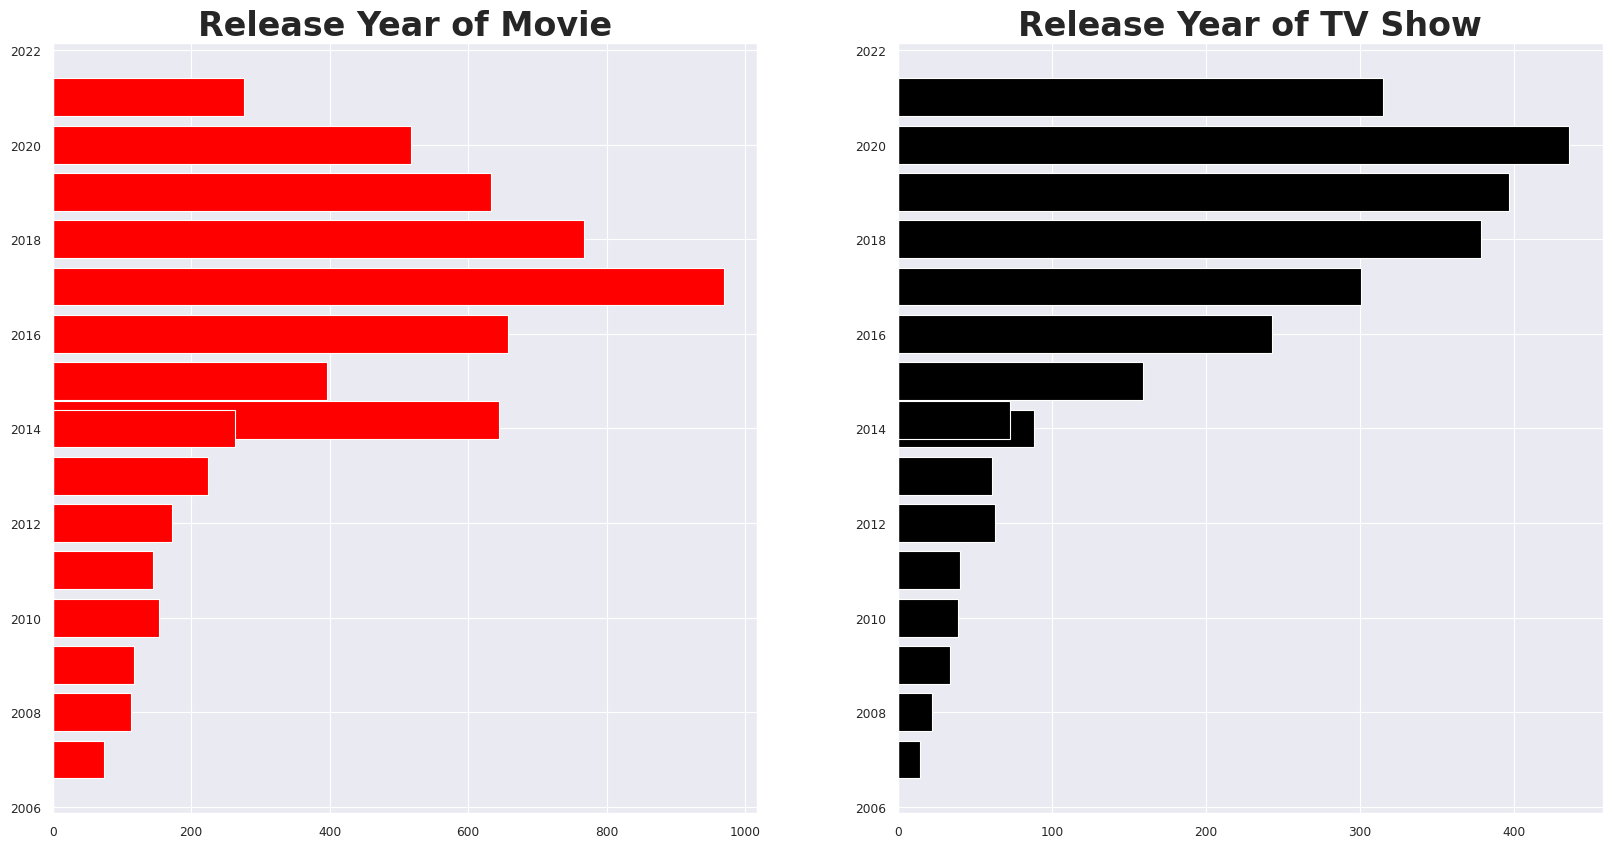

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
df_movie = pd.DataFrame(df.groupby('type')['release_year'].value_counts()['Movie'].sort_values(ascending=False))
ax1.barh(df_movie.index, df_movie.release_year, color='red')
ax1.set_title('Release Year of Movie', fontsize=24, fontweight='bold');
df_tv = pd.DataFrame(df.groupby('type')['release_year'].value_counts()['TV Show'].sort_values(ascending=False))
ax2.barh(df_tv.index, df_tv.release_year, color='black')
ax2.set_title('Release Year of TV Show', fontsize=24, fontweight='bold');

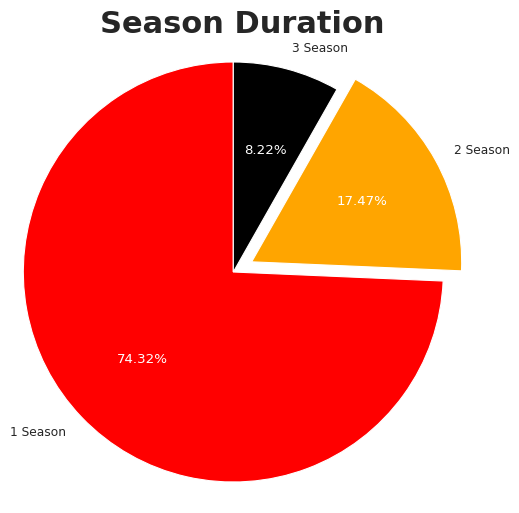

In [21]:
plt.figure(figsize=(6, 6))
labels=['1 Season', '2 Season', '3 Season']
_, _, texts = plt.pie(df.duration.value_counts()[:3], labels=labels, autopct='%1.2f%%', startangle=90,
                      explode=(0.0, 0.1, 0.0), colors=['red', 'orange', 'black'])
plt.axis('equal')
plt.title('Season Duration', fontsize=22, fontweight='bold');
for text in texts:
    text.set_color('white')

Text(0.5, 1.0, 'Different Ratings')

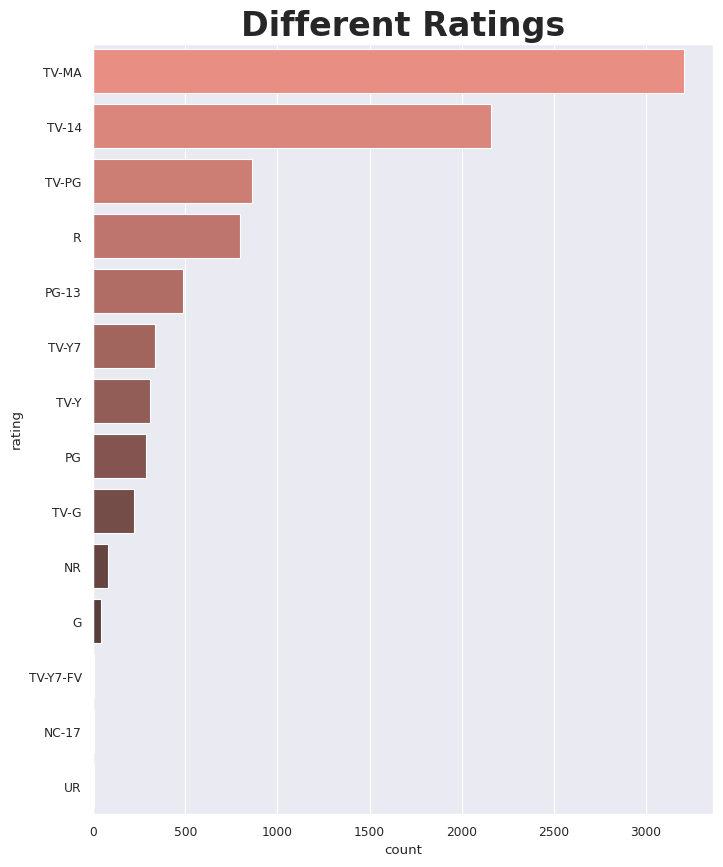

In [22]:
plt.figure(figsize=(8, 10))
sns.countplot(y='rating', data=df, order=df.rating.value_counts().index.to_list(), palette='dark:salmon_r')
plt.title('Different Ratings', fontsize=24, fontweight='bold')